mssubclass - Класс здания  
lotfrontage - Расстояние от фаса до дороги  
overallqual - Общее качество материала и отделки  
overallcond - Общая оценка состояния  
yearbuilt - Первоначальная дата постройки  
yearremodadd - Дата реконструкции  
masvnrarea - Площадь облицовки каменной кладки в квадратных футах  
bsmtfinsf1 - Тип 1 готовые квадратные футы  
bsmtfinsf2 - Тип 2 готовые квадратные футы  
bsmtunfsf - Незаконченные квадратные футы подвальной площади  
totalbsmtsf - Общая площадь подвала в квадратных футах  
1stflrsf - Квадратные футы первого этажа  
2ndflrsf - Квадратные футы второго этажа  
lowqualfinsf - Некачественная отделка квадратных футов (все этажи)  
grlivarea - Жилая площадь над уровнем моря (наземная), квадратные футы  
bsmtfullbath - Подвал с ванными комнатами  
bsmthalfbath - Половина ванных комнат на цокольном этаже  
fullbath - Полноценные ванные комнаты высшего класса  
halfbath - Половинные ванны выше класса  
bedroomabvgr - Количество спален над цокольным этажом  
kitchenabvgr - Количество кухонь  
totrmsabvgrd - Общее количество комнат (не включая ванные комнаты)  
fireplaces - Количество каминов  
garageyrblt - Год постройки гаража  
garagecars - Размер гаража (в вместимости автомобилей)  
garagearea - Размер гаража в квадратных футах  
wooddecksf - Площадь деревянных полов в квадратных футах  
openporchsf - Площадь открытой веранды в квадратных футах  
enclosedporch - Площадь закрытого крыльца в квадратных футах  
3ssnporch - Площадь крыльца на три сезона в квадратных футах  
screenporch - Площадь крыльца с экраном в квадратных футах  
poolarea - Площадь бассейна в квадратных футах  
miscval - Значение разных функций  
mosold - Месяц продажи  
yrsold - Год продажи  
saleprice - Цена продажи

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from catboost import CatBoostRegressor

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv('train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
data.columns = data.columns.str.lower()

In [5]:
delete_test = ['id', 'mssubclass', 'overallqual', 'yearremodadd', 'masvnrarea', 'bsmtfinsf2', 'bsmtunfsf', '1stflrsf', '2ndflrsf',
          'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
          'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'enclosedporch', '3ssnporch', 'screenporch',
          'poolarea', 'miscval', 'mosold', 'yrsold', 'alley', 'poolqc','fence','miscfeature']

In [6]:
data = data.drop(delete_test, axis = 1)

In [7]:
data.isnull().sum()

mszoning           0
lotfrontage      259
lotarea            0
street             0
lotshape           0
landcontour        0
utilities          0
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallcond        0
yearbuilt          0
roofstyle          0
roofmatl           0
exterior1st        0
exterior2nd        0
masvnrtype         8
exterqual          0
extercond          0
foundation         0
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfinsf1         0
bsmtfintype2      38
totalbsmtsf        0
heating            0
heatingqc          0
centralair         0
electrical         1
grlivarea          0
kitchenqual        0
functional         0
fireplacequ      690
garagetype        81
garagefinish      81
garagequal        81
garagecond        81
paveddrive         0
openporchsf        0
saletype           0
salecondition      0
saleprice    

In [8]:
data.lotfrontage = data.lotfrontage.fillna(data.lotfrontage.median())

In [9]:
data['mszoning']=data['mszoning'].fillna(data['mszoning'].mode()[0])
data['utilities']=data['utilities'].fillna(data['utilities'].mode()[0])
data['exterior1st']=data['exterior1st'].fillna(data['exterior1st'].mode()[0])
data['exterior2nd']=data['exterior2nd'].fillna(data['exterior2nd'].mode()[0])
data['masvnrtype']=data['masvnrtype'].fillna(data['masvnrtype'].mode()[0])
data['bsmtqual']=data['bsmtqual'].fillna(data['bsmtqual'].mode()[0])
data['bsmtcond']=data['bsmtcond'].fillna(data['bsmtcond'].mode()[0])
data['bsmtexposure']=data['bsmtexposure'].fillna(data['bsmtexposure'].mode()[0])
data['bsmtfintype1']=data['bsmtfintype1'].fillna(data['bsmtfintype1'].mode()[0])
data['bsmtfinsf1']=data['bsmtfinsf1'].fillna(data['bsmtfinsf1'].mean())
data['bsmtfintype2']=data['bsmtfintype2'].fillna(data['bsmtfintype2'].mode()[0])
data['totalbsmtsf']=data['totalbsmtsf'].fillna(data['totalbsmtsf'].mean())
data['kitchenqual']=data['kitchenqual'].fillna(data['kitchenqual'].mode()[0])
data['functional']=data['functional'].fillna(data['functional'].mode()[0])
data['fireplacequ']=data['fireplacequ'].fillna(data['fireplacequ'].mode()[0])
data['garagetype']=data['garagetype'].fillna(data['garagetype'].mode()[0])
data['garagefinish']=data['garagefinish'].fillna(data['garagefinish'].mode()[0])
data['garagequal']=data['garagequal'].fillna(data['garagequal'].mode()[0])
data['garagecond']=data['garagecond'].fillna(data['garagecond'].mode()[0])
data['saletype']=data['saletype'].fillna(data['saletype'].mode()[0])

In [10]:
data.shape

(1460, 48)

In [11]:
x_train = data.drop('saleprice', axis=1)
y_train = data['saleprice']

In [12]:
x_train.shape

(1460, 47)

<AxesSubplot:>

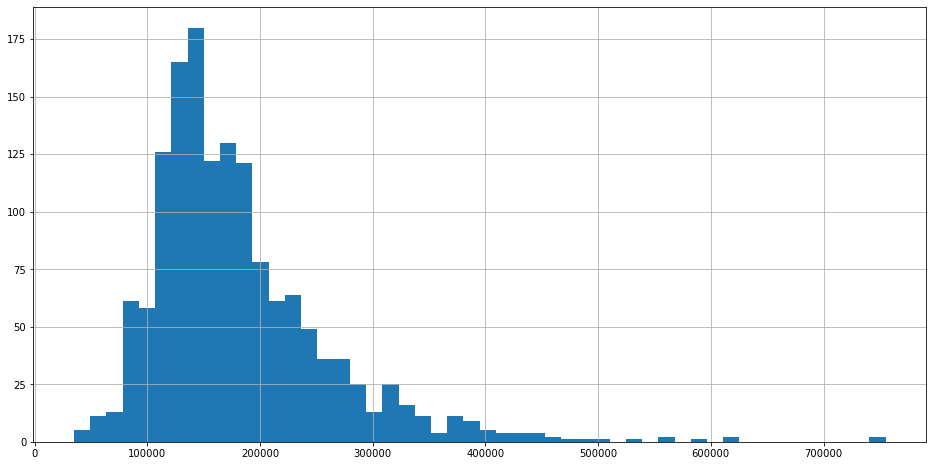

In [19]:
y_train.hist(figsize=(16, 8), bins=50)

In [20]:
y_log = np.log(y_train)

In [21]:
y_log.skew()

0.12133506220520406

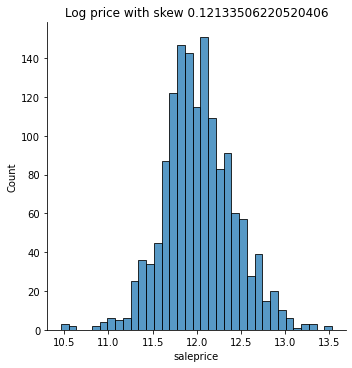

In [22]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

In [23]:
x_train_1 = pd.get_dummies(x_train, drop_first=True)
x_train_1.head()

,lotfrontage,lotarea,overallcond,yearbuilt,bsmtfinsf1,totalbsmtsf,grlivarea,openporchsf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,65.0,8450,5,2003,706,856,1710,61,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,8,1976,978,1262,1262,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,

In [24]:
x_train_1.shape

(1460, 208)

In [25]:
razn = ['utilities_NoSeWa',
        'condition2_RRAe',
        'condition2_RRAn',
        'condition2_RRNn',
        'housestyle_2.5Fin',
        'roofmatl_CompShg',
        'roofmatl_Membran',
        'roofmatl_Metal',
        'roofmatl_Roll',
        'exterior1st_ImStucc',
        'exterior1st_Stone',
        'exterior2nd_Other',
        'heating_GasA',
        'heating_OthW',
        'electrical_Mix',
        'garagequal_Fa']

In [26]:
x_train_1 = x_train_1.drop(razn, axis=1)

In [27]:
x_train_1.shape

(1460, 192)

In [81]:
%%time

model_cat = CatBoostRegressor(random_state=12345)
params = {'iterations' : [50, 150, 300, 450, 600], 'depth' : [4, 6, 10, 12], 'learning_rate' : [0.03, 0.1, 0.15, 0.2], 'verbose' : [False]}

gsearch = GridSearchCV(model_cat, cv=5, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)
gsearch.fit(x_train_1, y_log)

print(gsearch.best_params_)
print(np.abs(gsearch.best_score_))
print()

{'depth': 4, 'iterations': 450, 'learning_rate': 0.1, 'verbose': False}
0.12790402595721248

Wall time: 1h 21min 31s


# Test

In [35]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
test.columns = test.columns.str.lower()

In [37]:
delete_test = ['id', 'mssubclass', 'overallqual', 'yearremodadd', 'masvnrarea', 'bsmtfinsf2', 'bsmtunfsf', '1stflrsf', '2ndflrsf',
          'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
          'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'enclosedporch', '3ssnporch', 'screenporch',
          'poolarea', 'miscval', 'mosold', 'yrsold', 'alley', 'poolqc','fence','miscfeature']

In [38]:
test = test.drop(delete_test, axis = 1)

In [39]:
test.isnull().sum()

mszoning           4
lotfrontage      227
lotarea            0
street             0
lotshape           0
landcontour        0
utilities          2
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallcond        0
yearbuilt          0
roofstyle          0
roofmatl           0
exterior1st        1
exterior2nd        1
masvnrtype        16
exterqual          0
extercond          0
foundation         0
bsmtqual          44
bsmtcond          45
bsmtexposure      44
bsmtfintype1      42
bsmtfinsf1         1
bsmtfintype2      42
totalbsmtsf        1
heating            0
heatingqc          0
centralair         0
electrical         0
grlivarea          0
kitchenqual        1
functional         2
fireplacequ      730
garagetype        76
garagefinish      78
garagequal        78
garagecond        78
paveddrive         0
openporchsf        0
saletype           1
salecondition      0
dtype: int64

In [40]:
test.lotfrontage = test.lotfrontage.fillna(test.lotfrontage.median())

In [41]:
test['mszoning']=test['mszoning'].fillna(test['mszoning'].mode()[0])
test['utilities']=test['utilities'].fillna(test['utilities'].mode()[0])
test['exterior1st']=test['exterior1st'].fillna(test['exterior1st'].mode()[0])
test['exterior2nd']=test['exterior2nd'].fillna(test['exterior2nd'].mode()[0])
test['masvnrtype']=test['masvnrtype'].fillna(test['masvnrtype'].mode()[0])
test['bsmtqual']=test['bsmtqual'].fillna(test['bsmtqual'].mode()[0])
test['bsmtcond']=test['bsmtcond'].fillna(test['bsmtcond'].mode()[0])
test['bsmtexposure']=test['bsmtexposure'].fillna(test['bsmtexposure'].mode()[0])
test['bsmtfintype1']=test['bsmtfintype1'].fillna(test['bsmtfintype1'].mode()[0])
test['bsmtfinsf1']=test['bsmtfinsf1'].fillna(test['bsmtfinsf1'].mean())
test['bsmtfintype2']=test['bsmtfintype2'].fillna(test['bsmtfintype2'].mode()[0])
test['totalbsmtsf']=test['totalbsmtsf'].fillna(test['totalbsmtsf'].mean())
test['kitchenqual']=test['kitchenqual'].fillna(test['kitchenqual'].mode()[0])
test['functional']=test['functional'].fillna(test['functional'].mode()[0])
test['fireplacequ']=test['fireplacequ'].fillna(test['fireplacequ'].mode()[0])
test['garagetype']=test['garagetype'].fillna(test['garagetype'].mode()[0])
test['garagefinish']=test['garagefinish'].fillna(test['garagefinish'].mode()[0])
test['garagequal']=test['garagequal'].fillna(test['garagequal'].mode()[0])
test['garagecond']=test['garagecond'].fillna(test['garagecond'].mode()[0])
test['saletype']=test['saletype'].fillna(test['saletype'].mode()[0])

In [42]:
test.shape

(1459, 47)

In [43]:
test_ohe = pd.get_dummies(test, drop_first=True)
test_ohe.head()

,lotfrontage,lotarea,overallcond,yearbuilt,bsmtfinsf1,totalbsmtsf,grlivarea,openporchsf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasW,heating_Grav,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,80.0,11622,6,1961,468.0,882.0,896,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,81.0,14267,6,1958,923.0,1329.0,1329,36,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,74.0,13830,5,199

In [44]:
test_ohe.shape

(1459, 192)

In [122]:
cat = CatBoostRegressor(random_state=12345,
                        verbose=False, depth=4,
                        iterations=450,
                        learning_rate=0.1)

cat.fit(x_train_1, y_train)
cat_pred = cat.predict(test_ohe.values)

In [123]:
pred_cat = pd.DataFrame(cat_pred)

In [124]:
sub = pd.read_csv('sample_submission.csv')
datasets_cat=pd.concat([sub['Id'], pred_cat],axis=1)
datasets_cat.columns=['Id','SalePrice']
datasets_cat.to_csv('sample_submission_cat2.csv',index=False)